In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score




# Upload file
uploaded = files.upload()

# Load the dataset into a DataFrame
df = pd.read_csv(next(iter(uploaded)))

# Preview the first few rows of the data
df.head()

Saving super-bowl-ratings.csv to super-bowl-ratings (6).csv


,super_bowl,super_bowl_number,date,network,average_viewers,total_viewers,household_rating,household_share,cost_of_30_second_ad_usd
0,I,1,1967-01-15,NBC,24430000,35600000.0,18.5,36,37500
1,II,2,1968-01-14,CBS,39120000,51300000.0,36.8,68,54500
2,III,3,1969-01-12,NBC,41660000,54500000.0,36.0,70,55000
3,IV,4,1970-01-11,CBS,44270000,59200000.0,39.4,69,78200
4,V,5,1971-01-17,NBC,46040000,58500000.0,39.9,75,72500


In [ ]:
df.describe()

,super_bowl_number,average_viewers,total_viewers,household_rating,household_share,cost_of_30_second_ad_usd
count,55.00000,5.500000e+01,5.200000e+01,55.000000,55.000000,5.500000e+01
mean,28.00000,8.270818e+07,1.169133e+08,42.934545,66.763636,1.693144e+06
std,16.02082,2.084626e+07,3.447969e+07,4.512338,5.984435,1.711794e+06
min,1.00000,2.443000e+07,3.560000e+07,18.500000,36.000000,3.750000e+04
25%,14.50000,7.549000e+07,9.750750e+07,41.200000,63.000000,2.485000e+05
50%,28.00000,8.607000e+07,1.261400e+08,43.100000,68.000000,9.000000e+05
75%,41.50000,9.576500e+07,1.401850e+08,46.000000,70.000000,2.599982e+06
max,55.00000,1.144400e+08,1.720000e+08,49.100000,78.000000,5.500000e+06


In [ ]:
print(df.columns)
df.columns = df.columns.str.strip()


Index(['super_bowl', 'super_bowl_number', 'date', 'network', 'average_viewers',
       'total_viewers', 'household_rating', 'household_share',
       'cost_of_30_second_ad_usd'],
      dtype='object')


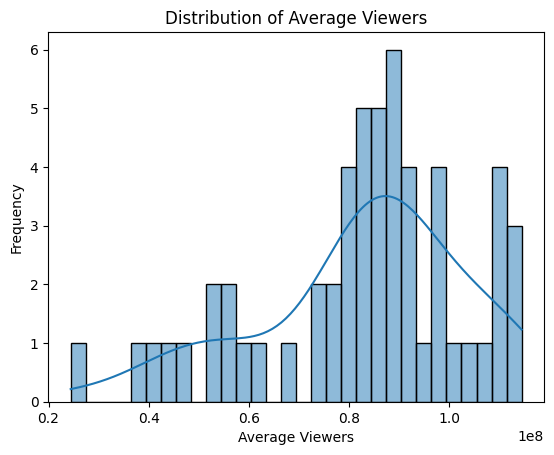

In [ ]:
sns.histplot(df['average_viewers'], bins=30, kde=True)
plt.title('Distribution of Average Viewers')
plt.xlabel('Average Viewers')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['average_viewers'] = pd.to_numeric(df['average_viewers'], errors='coerce')


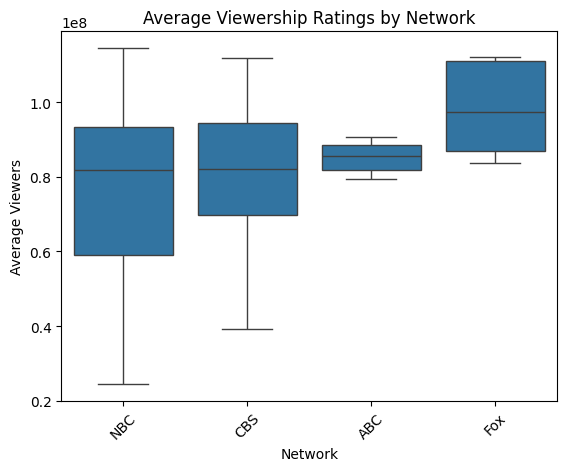

In [ ]:
sns.boxplot(x='network', y='average_viewers', data=df)
plt.title('Average Viewership Ratings by Network')
plt.xlabel('Network')
plt.ylabel('Average Viewers')
plt.xticks(rotation=45)
plt.show()

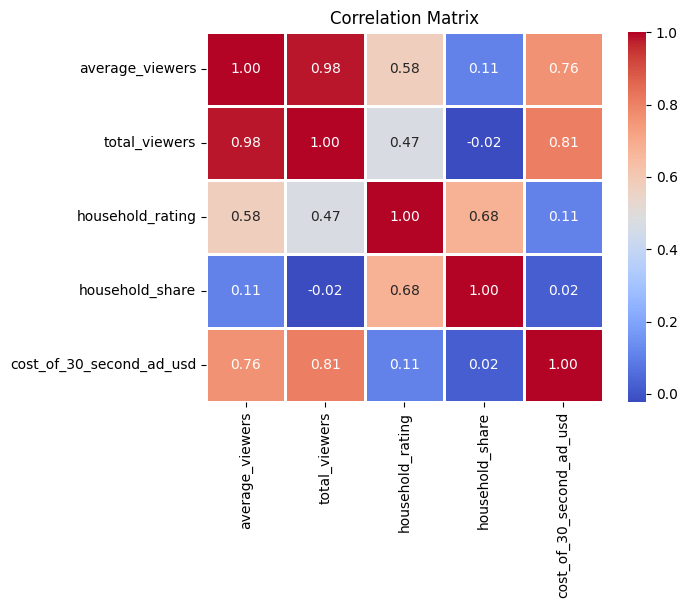

In [ ]:
correlation_matrix = df[['average_viewers', 'total_viewers', 'household_rating', 'household_share', 'cost_of_30_second_ad_usd']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.isnull().sum()

,0
super_bowl,0
super_bowl_number,0
date,0
network,0
average_viewers,0
total_viewers,3
household_rating,0
household_share,0
cost_of_30_second_ad_usd,0


In [ ]:
numerical_columns = ['average_viewers', 'total_viewers', 'household_rating', 'household_share', 'cost_of_30_second_ad_usd']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing categorical data (e.g., network)
df.dropna(subset=['network'], inplace=True)


<ipython-input-84-a138873cc0fb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
df = pd.get_dummies(df, columns=['network'], drop_first=True)

df['performance_diff'] = abs(df['household_rating'] - df['household_share'])
scaler = StandardScaler()
df[['average_viewers', 'cost_of_30_second_ad_usd']] = scaler.fit_transform(df[['average_viewers', 'cost_of_30_second_ad_usd']])
df.head()

,super_bowl,super_bowl_number,date,average_viewers,total_viewers,household_rating,household_share,cost_of_30_second_ad_usd,network_CBS,network_Fox,network_NBC,performance_diff
0,I,1,1967-01-15,-2.821384,35600000.0,18.5,36,-0.976112,False,False,True,17.5
1,II,2,1968-01-14,-2.110207,51300000.0,36.8,68,-0.966090,True,False,False,31.2
2,III,3,1969-01-12,-1.987239,54500000.0,36.0,70,-0.965795,False,False,True,34.0
3,IV,4,1970-01-11,-1.860883,59200000.0,39.4,69,-0.952117,True,False,False,29.6
4,V,5,1971-01-17,-1.775193,58500000.0,39.9,75,-0.955478,False,False,True,35.1


In [ ]:
df['high_rating'] = (df['household_rating'] > df['household_rating'].median()).astype(int)


X = df.drop(['high_rating', 'super_bowl', 'date'], axis=1)

y = df['high_rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(44, 10) (11, 10) (44,) (11,)


In [ ]:

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\n")


print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

if accuracy_score(y_test, y_pred_lr) > accuracy_score(y_test, y_pred_rf):
    print("\nLogistic Regression performed better based on accuracy.")
else:
    print("\nRandom Forest performed better based on accuracy.")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       1.00      0.62      0.77         8

    accuracy                           0.73        11
   macro avg       0.75      0.81      0.72        11
weighted avg       0.86      0.73      0.74        11

Accuracy: 0.7272727272727273


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.88      0.93         8

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11

Accuracy: 0.9090909090909091

Random Forest performed better based on accuracy.
